In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

## Step 1: Load the dataset

In [ ]:
file_path = 'data-set for decision tree.csv'
dataset = pd.read_csv(file_path)
dataset.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


## Step 2: Handle missing values and preprocess

In [ ]:
dataset.replace('?', pd.NA, inplace=True)
dataset.dropna(inplace=True)

## Step 3: Encode categorical variables

In [ ]:
label_encoders = {}
for column in dataset.columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le
dataset.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


## Step 4: Split the dataset into training and testing sets

In [ ]:
X = dataset.drop('income', axis=1)
y = dataset['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 5: Train the Decision Tree model

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Step 6: Make predictions and evaluate

In [ ]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      6754
           1       0.64      0.55      0.59      2295

    accuracy                           0.81      9049
   macro avg       0.75      0.72      0.73      9049
weighted avg       0.80      0.81      0.80      9049



## Step 7: Visualize the Decision Tree

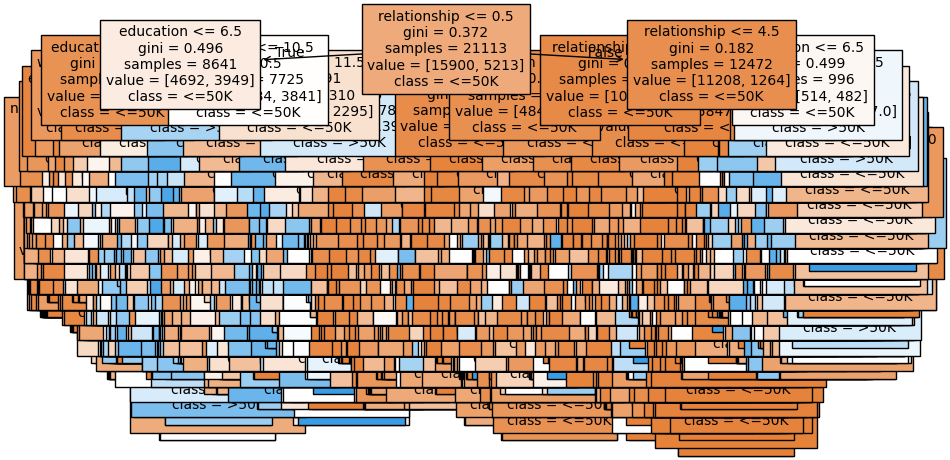

In [ ]:
plt.figure(figsize=(10, 5))
plot_tree(dt_model, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True, fontsize=10)
plt.show()